In [61]:
import keras
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, AveragePooling2D
import os
from sklearn.preprocessing import LabelEncoder

In [3]:
os.chdir(r"C:\Users\india\Downloads\archive (14)\PlantVillage")

In [4]:
os.getcwd()

'C:\\Users\\india\\Downloads\\archive (14)\\PlantVillage'

In [5]:
dataset = r"C:\Users\india\Downloads\archive (14)\PlantVillage"

In [6]:
for i in os.listdir(dataset):
    types = os.path.join(dataset, i)

In [7]:
images = []
label = []
dataset = r"C:\Users\india\Downloads\archive (14)\PlantVillage"
for i in os.listdir(dataset):
    types = os.path.join(dataset, i)
    
    if os.path.isdir(types):
        for j in os.listdir(types):
            image_path = os.path.join(types,j)
            img = cv2.imread(image_path)
            
            if img is not None:
                images.append(img)
                label.append(i)
            
    

In [8]:
images

[array([[[127, 120, 123],
         [165, 158, 161],
         [152, 145, 148],
         ...,
         [178, 171, 174],
         [175, 168, 171],
         [173, 166, 169]],
 
        [[135, 128, 131],
         [152, 145, 148],
         [146, 139, 142],
         ...,
         [188, 181, 184],
         [184, 177, 180],
         [180, 173, 176]],
 
        [[154, 147, 150],
         [138, 131, 134],
         [136, 129, 132],
         ...,
         [183, 176, 179],
         [179, 172, 175],
         [176, 169, 172]],
 
        ...,
 
        [[159, 145, 149],
         [127, 113, 117],
         [140, 126, 130],
         ...,
         [169, 158, 160],
         [172, 159, 161],
         [172, 159, 161]],
 
        [[118, 104, 108],
         [115, 101, 105],
         [136, 122, 126],
         ...,
         [171, 160, 162],
         [174, 161, 163],
         [175, 162, 164]],
 
        [[157, 143, 147],
         [103,  89,  93],
         [138, 124, 128],
         ...,
         [178, 167, 169],
  

In [9]:
len(images)

2152

In [10]:
image_array = np.asarray(images)

In [11]:
len(label)

2152

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [13]:
one = OneHotEncoder()
le = LabelEncoder()

In [14]:
class_label = le.fit_transform(label)

In [15]:
from tensorflow.keras.utils import to_categorical

classlabels = to_categorical(class_label)

In [16]:
classlabels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

0 - Early_blight
1 - Late_blight
2 - Healthy

In [17]:
import matplotlib.pyplot as plt

[0. 0. 1.]


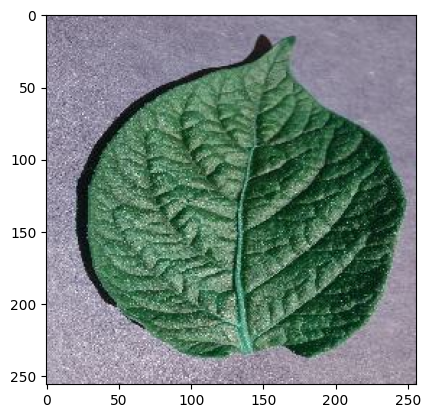

In [18]:
plt.imshow(image_array[1000])
print(classlabels[1000])

In [19]:
model = Sequential()
model.add(InputLayer(input_shape=(256, 256, 3)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


C:\Users\india\anaconda3\envs\DataScience\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [20]:
model.add(Flatten())

# Dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer example for 10 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,397,802 (28.22 MB)

 Trainable params: 7,397,802 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(image_array, class_label, batch_size=50, epochs=5)

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9251 - loss: 0.2375
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9730 - loss: 0.1023
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9927 - loss: 0.0444
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 49s 852ms/step - accuracy: 0.9940 - loss: 0.0266
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 874ms/step - accuracy: 0.9941 - loss: 0.0184


In [35]:
img = cv2.imread(r"C:\Users\india\Downloads\archive (14)\PotatoPlants\Potato___Early_blight\0a8a68ee-f587-4dea-beec-79d02e7d3fa4___RS_Early.B 8461.JPG")

In [36]:
img.shape

(256, 256, 3)

In [37]:
img[np.newaxis].shape

(1, 256, 256, 3)

In [38]:
model.predict(img[np.newaxis])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[9.6053338e-01, 3.9376646e-02, 8.9997848e-05, 4.3401819e-22,
        1.3844097e-21, 9.7218731e-21, 8.6084454e-19, 4.1102702e-21,
        1.8449875e-18, 8.2912712e-19]], dtype=float32)

In [39]:
np.argmax(model.predict(img[np.newaxis]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


0

In [40]:
le.inverse_transform([np.argmax(model.predict(img[np.newaxis]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array(['Potato___Early_blight'], dtype='<U21')

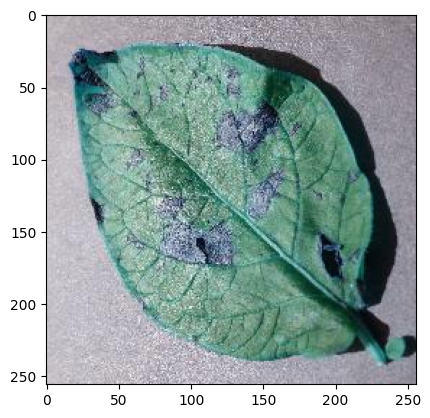

In [41]:
plt.imshow(img)

In [47]:
history.history['loss']

[0.2037573605775833,
 0.10642033815383911,
 0.04566781967878342,
 0.026681996881961823,
 0.013744323514401913]

In [49]:
history.history['accuracy']

[0.9326208233833313,
 0.9716542959213257,
 0.9897769689559937,
 0.9944238066673279,
 0.9967471957206726]

In [64]:
model = load_model('C:\\Users\\india\\Downloads\\archive (14)\\PlantVillage\\model.h5')

In [67]:
pickle.dump(model,open("crop_prediction.pkl",'wb'))

In [66]:
import pickle

In [71]:
os.listdir()

['crop_prediction.pkl',
 'model.h5',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight']